# Collecting and preparing data
## 1. Collecting data from the internet
### 1.1 Web scraping
The internet contains a wealth of data for your Natural Language Processing (NLP) projects. However, the data are usually not ready to be used for NLP projects, as they are not packaged in word document or spreadsheet that can be easily downloadable and further processed. Therefore, we have to learn to collect and process our own data. 

In this exercise, we will learn how to collect raw data from websites using a process known as 'web scraping'. We will build a web scraper that will collect information websites of your choice!  

### 1.1.1 Importing required libraries/ packages
First, we import the packages that are required: 
- The `requests` package allows our python script to communicate with websites and to 'request' information from those sites. 
- The beautiful soup package, also known as `bs4` takes the raw information from the websites and provides helpful functions to extract information.

In [3]:
import requests
import bs4

print ("You have successfully imported requests version "+requests.__version__)
print ("You have successfully imported beautifulsoup version "+bs4.__version__)

You have successfully imported requests version 2.32.3
You have successfully imported beautifulsoup version 4.12.3


Yay! Your packages are imported! Now, we are ready to start scraping some websites!

### 1.1.2 Finding out information about a website

Now, visit https://en.wikipedia.org/wiki/Jupiter to have a look at the contents of the page.

Once the page is shown, press **ctrl-shift-i (or F12) to look at the HTML of the site.** 
*Note: HTML stands for Hypertext Markup Language and it is a way for your computer browser (like chrome, internet explorer, safari) to understand how information should be displayed. 

When you visit a website, your computer uses HTML to send a request (called the 'GET' request) to the internet and waits for a response. The response eventually comes with a response code, and possibly the information requested which is then displayed on your computer browser.  

### Task: Visit [https://en.wikipedia.org/wiki/Jupiter](https://en.wikipedia.org/wiki/Jupiter) and press ctrl-shift-i (or F12) now! 

Pay close attention to anything you see within < angular brackets >. These tags tell the browser where and how to display the information contained within. Tags are used to identify sections of the web page, and we will be using these tags later to locate pieces of information we are interested in. 

### Task: Can you identify the various tags by looking at the HTML code?
  
Use the `requests.get()` function to call on the website. The `request.get()` function sends a 'GET' request to the website address and attempts to retrieve a response. The `request.get()` function should return 'Response [200]'. This means that we have successfully received information from the site.

In [5]:
base_url = 'https://en.wikipedia.org/wiki/Singapore'
r = requests.get(base_url)
r

<Response [200]>

### Task: Try changing the base_url from 'https://en.wikipedia.org/wiki/Jupiter' to 'https://en.wikipedia.org/wiki/Jus21'. 
What did the response code become? 

These codes can help in troubleshooting and solving connection problems, but now, we just need to know that a response of 200 means that your GET request was successful!

<em> In case the link is not working for you, you may get a `<Response [404]>` from the code above </em>

### Now change the base url back to 'https://en.wikipedia.org/wiki/Jupiter' from 'https://en.wikipedia.org/wiki/Jus21' to continue with the rest of the notebook.

Connection establised! We have access!

### 1.1.3 Using beautifulsoup to get data from websites

Now we can use `bs4` to read the outputs from our request. 

Beautiful Soup is a Python library for getting data out of HTML, XML, and other markup languages.
*Note: This section of the Jupyter Notebook is written in 'markup' format.

Much like our browser, bs4 is able to understand HTML and to read the < tags >;

See the code below!

In [131]:
# !pip install html5lib

In [7]:
#`r.text` contains the raw HTML returned when we made our GET request earlier. 
#`'html5lib'` tells BeautifulSoup that it is reading HTML information. 
soup = bs4.BeautifulSoup(r.text, 'html.parser')

In [92]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Singapore - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featur

Essentially, we are taking the raw response from the GET request, and asking BeautifulSoup to read and understand the response, and store all of this as your variable `soup`!

### 1.1.4 Using beautifulsoup to search for specific tags

This is where it gets interesting. BeautifulSoup can be used to search for specific tags. 

Let's use beautifulsoup to look for all the headings within the Wikipedia website!

In [9]:
headers = []
for url in soup.findAll("h3"):
    headers.append(url.text)
    print(url.text)

Ancient Singapore
British colonisation
Japanese occupation
Post-war period
Within Malaysia
Republic of Singapore
Foreign relations
Military
Human rights
Nature
Climate
Water supply
Virtual Singapore
Land
Air
Sea
Tourism
Religion
Languages
Arts
Cuisine
Sport and recreation
Media
Citations


In this code snippet, we find all `<h3>` tags. We then loop through each tag found and extract the text by using the .  

*Note: The `<h3>` tag defines a [header](https://www.w3docs.com/learn-html/html-header-tag.html), which defines the heading for the text to follow. To differentiate `<h3>` tags appearing in different locations, they can be 'named' with a `class=tag-name`. In this exercise, we are searching for headers `<h3>` without any classes. 

Let us now see if we have managed to collect all the links in the `headers`. Show the variable headers and check if the information has been added into this variable!

In [11]:
len(headers)

24

In [135]:
# your code here
headers

['Ancient Singapore',
 'British colonisation',
 'Japanese occupation',
 'Post-war period',
 'Within Malaysia',
 'Republic of Singapore',
 'Foreign relations',
 'Military',
 'Human rights',
 'Nature',
 'Climate',
 'Water supply',
 'Virtual Singapore',
 'Land',
 'Air',
 'Sea',
 'Tourism',
 'Religion',
 'Languages',
 'Arts',
 'Cuisine',
 'Sport and recreation',
 'Media',
 'Citations']

Have you noticed anything odd about the headers in the list? Some of the entries in the list are not relevant. And this is because some of the headers from the toolbar are also being included in the list. Let us remove those. 

In [13]:
i = len(headers) - 1
counter = 0
while counter <= i:
    if headers[counter].startswith('\n'):
        headers.pop(counter)
        counter -= 1
    counter += 1
    i = len(headers) -1
print(headers)

['Ancient Singapore', 'British colonisation', 'Japanese occupation', 'Post-war period', 'Within Malaysia', 'Republic of Singapore', 'Foreign relations', 'Military', 'Human rights', 'Nature', 'Climate', 'Water supply', 'Virtual Singapore', 'Land', 'Air', 'Sea', 'Tourism', 'Religion', 'Languages', 'Arts', 'Cuisine', 'Sport and recreation', 'Media', 'Citations']


Now, we will extract the paragraph text of each heading by looping through the paragraph tags that come after each header. Let us see how it is done for one header and you can then do it for all the headers of your choice. 
  
Using the same method as before, visit the first link and press F12 to view page source. Select the element containing the main text and you will be able to see the element source on the panel. Note that the text is surrounded by `<p>` tags.We will be using this information to extract the text soon. Come, do that now!
  
Notice that on this page, the information is stored within a `<p>` tag. We want to find all paragraphs , so we look for `<p>`  tags, and we call `.get_text()` to retrieve the actual words!

In [19]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text, 'html.parser')
deet = soup.find('h3', string = headers[4]) # Search for div tags of class 'entry-content content'
if deet is None:
    print(f"Could not find h3 tag with text: {headers[4]}")
else:
    # Find next p tag
    para = deet.find_next('p')  # Changed find_next_sibling to find_next
    if para is None:
        print("Could not find a p tag after the h3 tag")
    else:
        print(para.get_text())

PAP leaders believed that Singapore's future lay with Malaya, due to strong ties between the two. It was thought that reuniting with Malaya would benefit the economy by creating a common market, alleviating ongoing unemployment woes in Singapore. However, a sizeable left-wing faction of the PAP was strongly opposed to the merger, fearing a loss of influence, and hence formed the Barisan Sosialis, after being kicked out from the PAP.[78][79] The ruling party of Malaya, United Malays National Organisation (UMNO), was staunchly anti-communist, and it was suspected UMNO would support the non-communist factions of PAP. UMNO, initially sceptical of the idea of a merger due to distrust of the PAP government and concern that the large ethnic Chinese population in Singapore would alter the racial balance in Malaya on which their political power base depended, became supportive of the idea of the merger due to joint fear of a communist takeover.[80]



In the above code we use the `find_next` function to get the next paragraph tag that comes after the header labelled "Composition". Notice in the above code snippet how the we only get one paragraph as a result. But if you take a look once again at the [link](https://en.wikipedia.org/wiki/Jupiter), you will find that there are 3 paragraphs in the "Composition" header. How can we get all of the paragraphs? 

The solution is to loop through the next siblings. The rules we have set are as follows:

- If the next sibling is an `<h2>` or `<h3>` tag then go to the next header.

- If the tag is a `<p>` tag, only then should you print the text.

Take a look at the code snippet below to see the results. 

Now that we can see how it is possible to extract text from a web page, it is your turn!  
### Task 1: Write a function that can loop through the entries in `headers`

Extract the contents of each header. Combine all the text into a variable "all_para"

In [221]:
b = soup.find_all('h3')
b

[<h3 id="Ancient_Singapore">Ancient Singapore</h3>,
 <h3 id="British_colonisation">British colonisation</h3>,
 <h3 id="Japanese_occupation">Japanese occupation</h3>,
 <h3 id="Post-war_period">Post-war period</h3>,
 <h3 id="Within_Malaysia">Within Malaysia</h3>,
 <h3 id="Republic_of_Singapore">Republic of Singapore</h3>,
 <h3 id="Foreign_relations">Foreign relations</h3>,
 <h3 id="Military">Military</h3>,
 <h3 id="Human_rights">Human rights</h3>,
 <h3 id="Nature">Nature</h3>,
 <h3 id="Climate">Climate</h3>,
 <h3 id="Water_supply">Water supply</h3>,
 <h3 id="Virtual_Singapore">Virtual Singapore</h3>,
 <h3 id="Land">Land</h3>,
 <h3 id="Air">Air</h3>,
 <h3 id="Sea">Sea</h3>,
 <h3 id="Tourism">Tourism</h3>,
 <h3 id="Religion">Religion</h3>,
 <h3 id="Languages">Languages</h3>,
 <h3 id="Arts">Arts</h3>,
 <h3 id="Cuisine">Cuisine</h3>,
 <h3 id="Sport_and_recreation">Sport and recreation</h3>,
 <h3 id="Media">Media</h3>,
 <h3 id="Citations">Citations</h3>]

In [23]:
r = requests.get(base_url)
all_para = ""
soup = bs4.BeautifulSoup(r.text,'html.parser')
for iteri in range(len(headers)):
    deet = soup.find('h3', string = headers[iteri]) # Search for H3 tags of class 
    if deet is None:
        print(f"Could not find h3 tag with text: {headers[iteri]}")
    else:
        # Find next p tag
        para = deet.find_next('p')
        if para is None:
            print("Could not find a p tag after the h3 tag")
        else:
            print(deet.get_text())
            print(para.get_text())
            all_para += para.get_text()
            

Ancient Singapore
In 1299, according to the Malay Annals, the Kingdom of Singapura was founded on the island by Sang Nila Utama.[25] Although the historicity of the accounts as given in the Malay Annals is the subject of academic debates,[26] it is nevertheless known from various documents that Singapore in the 14th century, then known as Temasek, was a trading port under the influence of both the Majapahit Empire and the Siamese kingdoms,[27] and was a part of the Indosphere.[28][29][30][31][32] These Indianised kingdoms were characterised by surprising resilience, political integrity and administrative stability.[33] Historical sources also indicate that around the end of the 14th century, its ruler Parameswara was attacked by either the Majapahit or the Siamese, forcing him to move to Malacca where he founded the Sultanate of Malacca.[34] Archaeological evidence suggests that the main settlement on Fort Canning Hill was abandoned around this time, although a small trading settlement

### 1.2 Storing data
Congratulations! You have built your very own scraper and used it to collect data from several webpages. You now need a way to store this data so you do not have to scrape the websites every time you want to access the data. Storing the information collected also preserves the data in the event that the website is taken down or changed.

### Task 2: Write code to save your data as a text file. 

If you need help, try https://stackoverflow.com/questions/899103/writing-a-list-to-a-file-with-python or searching on your own using any search engine of your choice.

*Note: You will have to create a file object with open(filename). Then use the .write() attribute to write text into the file. See the documentation for writing to file at https://www.guru99.com/reading-and-writing-files-in-python.html

In [25]:
with open('./wiki_singapore.txt', 'wb') as file_handler:
        file_handler.write(all_para.encode('utf8'))

Great! Now check your file on your directory folder and see if you have the required information captured there

### 1.3 Other data sources
Congratulations! you are now equipped to download text from any website. Do take note that different websites have different html structures, so you will have to modify your code for each site you scrape. 

How then can we get alot of data without caring too much on the differences between the websites?

#### How else can we get lots of data?  
  
Fortunately, there are great amount of data that has already been compiled by other people. These files may be saved in a document format such as .csv or .txt which can be easily downloaded with a simple script. 

There are sites dedicated to harvesting interesting datasets which can then be easily downloaded by anyone and used for AI.
Check out where you can get free, processed data for your projects: 
- https://www.figure-eight.com/data-for-everyone/.  
- https://github.com/niderhoff/nlp-datasets

Take a look at some of the datasets and think of things you would like to work on. 

### Downloading tweet data 
For now, we will be looking at a dataset that captures social media responses in the from of tweets.

This dataset consists of a series of tweets, along with an indication of whether the tweet is relevant to a disaster, or not relevant to a disaster. 

How do you think this dataset can be used to train an AI system? How do you think this dataset can be helpful?  
  
Being able to classify tweets will allow us to filter out noise and gain information from useful tweets in real time during an actual disaster. These tweets may contain helpful information on places to avoid, how to help, or how to ask for help.  
  
The code below downloads and saves a .csv file located at `url` using the library `urllib`

In [27]:
import urllib

url = 'https://sl2files.sustainablelivinglab.org/DatasetSocialMedia-Disaster-tweets-DFE.csv'

csv = urllib.request.urlopen(url).read()
with open('./socialmedia disaster tweets DFE.csv', 'wb') as fx:
    fx.write(csv)

Great! We've now downloaded our data! Check out the csv file we have just created! 

Notice how the dataset is structured. 
What headers do you see?

## 2.1 Processing text
In its raw form, tweets are just strings of text. While humans can easily read and understand strings of text, computers have a much harder time doing so. Therefore, we will have to perform preprocessing on these strings to break them up into a form that our computers can recognize and work on. 

Preprocessing the text will also allow us to analyze and visualize the text, and to look for trends and features that your computer will then be able to use to classify your text.  
  
Let us practice using the dataset on tweet disasters.  

First, we import the packages we need:
- The pandas package helps us to load files into our program in a structure called a dataframe
- The nltk package is the star of the show that allows us to process and visualize text.

In [29]:
import pandas as pd
import nltk

print ("You have successfully imported pandas version "+pd.__version__)
print ("You have successfully imported nltk version "+nltk.__version__)

You have successfully imported pandas version 2.2.2
You have successfully imported nltk version 3.9.1


In [31]:
# load the csv file that contains the tweets on natural disasters into a pandas dataframe
df_raw = pd.read_csv('socialmedia disaster tweets DFE.csv',encoding='ISO-8859-1')

print ("You have successfully loaded your csv file")

You have successfully loaded your csv file


Let us take a quick look at the data!  
using `.head(5)` on a pandas dataframe lets us look at the first 5 lines of the dataframe. 

In [33]:
df_raw.head(5)

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [37]:
df_raw.sample(10)

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
6168,6168,778250985,False,finalized,5,9/1/15 17:58,Relevant,0.4014,NaN,hijack,#HDYNATION,hijack,6.290750e+17,5.171580e+08
7166,7166,778251983,False,finalized,5,9/1/15 16:27,Not Relevant,0.7958,NaN,mudslide,"Chiswick, London",2 great new recipes; mudslide cake and so sorr...,6.290180e+17,2.431691e+08
3520,3520,778248336,False,finalized,5,8/27/15 22:03,Relevant,1.0000,NaN,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,6.290380e+17,3.071932e+09
6270,6270,778251087,False,finalized,5,8/30/15 8:00,Relevant,0.5951,NaN,hijacking,http://wingssilverwork.com,@ReasonVsFear 'One?' Oh nonononono. This hij...,6.290730e+17,1.647767e+08
301,301,778245117,False,finalized,5,8/29/15 8:04,Not Relevant,0.5974,NaN,annihilated,NaN,@Volfan326 @TNeazzy Mizzou has annihilated flo...,6.290920e+17,4.183818e+08
4657,4657,778249474,False,finalized,5,8/28/15 4:21,Relevant,1.0000,NaN,engulfed,"Glendale, CA",#TRAFFICALERT Eastbound 210 Freeway at Citrus...,6.290850e+17,6.331121e+08
2408,2408,778247224,False,finalized,5,9/1/15 19:34,Not Relevant,0.7992,NaN,collide,NaN,And when those waves shall ripple collide it's...,6.290940e+17,2.278167e+09
8010,8010,778252827,False,finalized,5,8/27/15 17:29,Relevant,1.0000,NaN,refugees,Ad Majorem Dei Glorium,Police Monitoring 200 Jihadis in Poland http:/...,6.290830e+17,3.997075e+08
8941,8941,778253759,False,finalized,5,8/28/15 18:27,Not Relevant,0.8018,NaN,snowstorm,Italy,Snowstorm planned outside #Rome's St Mary Majo...,6.289610e+17,2.263348e+09
4874,4874,778249691,False,finalized,5,9/1/15 18:08,Not Relevant,0.5958,NaN,explode,"New Orleans, Louisiana",See these guys reaching the front foot out loa...,6.290900e+17,2.165387e+09


How would you inspect the first 10 lines of the dataframe? Try it on the code block above!

In [47]:
df_raw.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state',
       '_trusted_judgments', '_last_judgment_at', 'choose_one',
       'choose_one:confidence', 'choose_one_gold', 'keyword', 'location',
       'text', 'tweetid', 'userid'],
      dtype='object')

The pandas dataframe looks like a spreadsheet, with each column containing a category of data, and each row representing the information from a single tweet.  

There are many columns, and we will not worry about those for now. Let us focus our attention on the column where the tweets are stored. 

See the dataframe above! Can you tell which column we should inspect to see the tweets? putting the column name in string format inside square brackets lets you select just that column. i.e. `df_raw['column_name']`

### Task: Try out different columns and see the data included

In [49]:
df_raw['text'].head()

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

Let us look at a few random samples of tweets. use .sample() to view the samples. 

In [69]:
list[df_raw["text"].iloc[30]]

list["No I don't like cold!"]

In [57]:
df_raw['text'].sample()

142    Please donate and spread the word! A training ...
Name: text, dtype: object

In [59]:
list(df_raw['text'].sample())

['FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/MqbYrAvK6h']

How would you view 5 random samples? Remember what you did earlier with `.head(5)`? Try it above!

Since each row is data collected from a single tweet, how can we find the total number of tweets in the dataset?  
hint: use `len(dataframe)` to count the number of rows in a dataframe

In [71]:
# your code here
len(df_raw)

10876

### Focusing on the text data

Excellent! Let us now move into just the text. Since we do not need the rest of the columns, let us create a new dataframe that consists of just the text. It is a good practice to put 'df' in front of the names of dataframes to help you remember that you are working with an object of type:dataframe. using `.copy()` makes sure that you do not modify the original, raw, dataset.

In [73]:
df_text = df_raw['text'].copy()

Check if the dataframe you have just created contains what you expect. Print out the first few lines of your new dataframe and check that they only contain the tweets in the 'text' column.

In [75]:
# your code here
df_text.head()

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

## 2.2 NLP data preprocessing

### Data Cleaning 


### Tokenization

The first step in the NLP task is to tokenize your tweets. Do you remember what tokenization does? let us see an example! We will use a single tweet to demonstrate what each process does. The tokenization is done by calling nltk.tokenize.word_token(your data here). See if you can tell what the function did by printing the text before and after tokenization.

In [77]:
sample_tweet = df_text.iloc[100]
print('Before tokenization:', sample_tweet)

Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour


In [79]:
nltk.download('punkt_tab') # changed this to punkt_tab
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/estebellekhong/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/estebellekhong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/estebellekhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/estebellekhong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [81]:
tokenized_tweet = nltk.tokenize.word_tokenize(sample_tweet)
print('After tokenization:', tokenized_tweet)

After tokenization: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


Can you tell what the tokenization step did? We can easily tell what individual words are when given a sentence but computers can't. We need to break the sentence up into words for the computer.
  
Another benefit of breaking up the sentence is that we can now measure the number of unique words in the corpus (our collection of texts). This is known as the vocabulary of the corpus. 

To do this we use a technique called [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python). The objective is to put all tokens in all tweets into a single list, then finding the number of unique values in that list of tokens.  

In [87]:
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in list(df_text)] # Creates a list of tweets, with each tweet being a list of tokens
len(set([y for x in tokenized_raw for y in x])) # Flattens the lists into a single list, then counts the number of unique tokens
# len([y for x in tokenized_raw for y in x]) # Flattens the lists into a single list, then counts the number of unique tokens

34848

We now know that there are 35335 unique tokens in the tweet dataset. That seems like a lot of words! One of the goals of text normalization is to reduce the number of words in the vocabulary by eliminating redundant words without sacrificing the meaning of the text.

### Stemming and Lemming

Now, let us look at what stemming and lemming does to the same sample tweet. We use the Porter Stemmer provided by `nltk.stem.PorterStemmer()`, as well as the Word Net lemmatizer by calling `nltk.stem.WordNetLemmatizer()`. Look at the printed outputs and compare them to the tokenized text above to spot the difference of each tool.

In [89]:
porter = nltk.stem.PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stemmed = [porter.stem(word) for word in tokenized_tweet]
print(stemmed)
lemmed = [wnl.lemmatize(word) for word in tokenized_tweet]
print(lemmed)

['http', ':', '//t.co/gkye6gjtk5', 'had', 'a', '#', 'personalinjuri', 'accid', 'thi', 'summer', '?', 'read', 'our', 'advic', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']
['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


Can you tell what they do? [The difference](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/) is subtle. 

A stemmer works by shortening words so that words with the same meaning but different forms will end up with the same token. For example, the token 'accident' was stemmed to 'accid'. Other similar words such as 'accidentally', 'accidental', and 'accidents' will all be stemmed to 'accid'. This helps to group words with similar meanings together.  
  
A lemmatizer is slightly different. It searches for words with the same meaning and replaces them with the root word. So words with the same meaning but quite different spellings will be understood by the computer to be a single word. The disadvantage of a lemmer is that it can take a long time to run.


### Removing stop-words
Next, we normalize the text by removing stop-words. Do you remember what stopwords are? nltk provides us with a list of stop words, let's see what they contain.

In [91]:
stop = nltk.corpus.stopwords.words('english')
# Add a few more stop words we would like to remove here
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now that we know what each piece of code does, we can build a function that takes in the dataframe, and returns the tokenized tweets.

In [93]:
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(tweet)
    stemmed = [porter.stem(word) for word in tokenized_tweet]
    processed = [w.lower() for w in stemmed if w not in stop]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

tweets = tokenizer(df_raw)

Pay close attention to the processed tweets. Do you notice that there are many words that are cut (e.g. terribl instead of terrible)? Do you remember why this is done?

In [95]:
tweets

[['happen', 'terribl', 'car', 'crash'],
 ['deed', 'reason', 'thi', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['heard', 'earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'gees',
  'flee',
  'across',
  'street',
  ',',
  'save'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada'],
 ['resid',
  'ask',
  "'shelter",
  'place',
  "'",
  'notifi',
  'offic',
  '.',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['13,000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['got',
  'sent',
  'thi',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  '=',
  '>',
  'california',
  'hwi',
  '.',
  '20',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  '-',
  'cafir',
  'wildfir'],
 ['apocalyps', 'light', '.', 'spokan', 'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  's

Play around with your data and the processing a little bit more. What happens when you use a lemmer instead of a stemmer? What other stopwords can you exclude? What about removing punctuation?
  
Now, print out the size of your processed vocabulary. How many words does it have now? Is it fewer or more than the original vocabulary?

In [97]:
# your code here
len(set([y for x in tweets for y in x]))

25883

With these pre-processing steps, we have taken raw tweet data, chopped it up into individual tokens, removed stop words, stemmed, and made it all lower case. This has decreased our vocabulary size by almost 10000 tokens!

### Data visualization

Let us visualize the data now. We are going to look at the distribution of the number of words in each tweet. This can be done using a histogram. What is the most common number of words in a tweet? In the process of classifying your dataset, your model may look at factors such as the length of the tweet, the number of words etc. Plotting your data out also helps you to ensure that your code is working, and not throwing out ridiculous numbers.

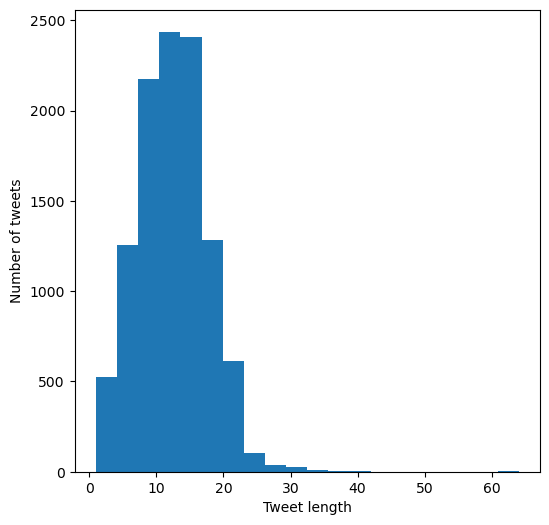

In [99]:
import matplotlib.pyplot as plt
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    fig = plt.figure(figsize=(6, 6)) 
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths, bins=20)
    plt.show()
    return sentence_lengths
tweet_lengths = plot_hist(tweets)

We can now see that the average tweet has about 12-15 words, and that there are a few with almost 60 words. What exactly is the length of the shortest tweet, the length of the longest tweet, and the average length of all tweets? Print those values out.

In [101]:
# Your code here
print('minimun: {}, maximum: {}, average: {:.2f}'.format(min(tweet_lengths), max(tweet_lengths), sum(tweet_lengths)/len(tweet_lengths)))

minimun: 1, maximum: 64, average: 12.43


We are getting to know our data more and more now. Let us dive deeper and see if we can determine if there is a difference in the average length of tweets for relevant and not relevant tweets. Perhaps it can be used as a good feature for future analyis.
  
To do that, we use the `'choose_one'` column in `df_raw`. If the value in the column is 'Relevant', the tweet is classified as relating to a natural disaster. If the value is 'Not Relevant', the tweet does not relate to a natural disaster.  
  
Can you print out the average length of tweet for relevant tweets, and the average length of tweet for not relevant tweets?
  
*Hint: the dataframe `df_result` has been constructed to contain the processed tweets and the relevance. create two dataframes, one containing only 'Relevant' tweets, and one containing only 'Not Relevant' tweets. This can be done by subsetting the dataframe: `df_result[df_result['choose_one']=='Relevant']`. We have given an example of how to do it to create a dataframe of positive examples. Can you create the dataframe of negative examples?  

*Hint 2: To calculate the length of each tweet, you can use the `.apply(len)` function. You can also use `.mean()` to get the mean of the results.

In [103]:
df_result = df_raw['choose_one'].copy().to_frame()
df_result['processed_text'] = tweets
df_neg=df_result[df_result['choose_one']=='Not Relevant']
df_pos=df_result[df_result['choose_one']=='Relevant']
print(df_pos['processed_text'].apply(len).mean(), df_neg['processed_text'].apply(len).mean())

12.749839503530922 12.193470179408438


In [107]:
df_result.sample(10)

,choose_one,processed_text
7575,Relevant,"[famili, sue, legionnair, 40, famili, affect, ..."
1363,Not Relevant,"[thing, pick, tozlet, seat|, butt, leprosi, fu..."
4585,Relevant,"[senat, call, emerg, hous, boxer, feinstein, b..."
9240,Relevant,"[1, major, reason, suicid, bomb, absenc, *, *,..."
10673,Not Relevant,"[ego_resolut, im, glad, ., *, *, *, *, heal, 1..."
5984,Relevant,"[road, hazard, e, confeder, ave, se, /, morela..."
9889,Not Relevant,"[ciaramckendri, mine, came, day, data, renew, ..."
9529,Relevant,"[three, isra, soldier, wound, west, bank, terr..."
900,Relevant,"[bbcworld, bioterror, drone, reach, larg, popu..."
10848,Not Relevant,"[heard, realli, loud, bang, everyon, asleep, g..."


Do you think tweet length make a good feature?

## Data analysis challenge

Using the skills you have learnt, apply the text processing process on the data you have gathered in the beginning of the notebook (from Wikipedia). Use the knowledge of data scraping and text processing you've gathered here. 

Report the initial and final vocabulary size!

In [109]:
# your code here
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in all_para] 
print('Initial vocab size {}'.format(len(set([y for x in tokenized_raw for y in x]))))



Initial vocab size 78


In [111]:
x = pd.DataFrame({'text':all_para}, index = [1])
processed_all_para = tokenizer(x)
print('Final vocab size {}'.format(len(set([y for x in processed_all_para for y in x]))))

Final vocab size 982


We have now learnt:
1. How to look for text data
2. How to collect data online using scrapers and various modules
3. How to save this data onto your computer
4. How to process this text data into a form your computer can understand
5. How to analyze and visualize the processed data

In the next module, we will learn how to take what we have learnt and use it to train an NLP model to actually recognize tweets!